**Практикум 10. Формула Тейлора для функций одной переменной**

**Упражнение 1. Вычислить значения первых пяти производных функции $y=cos(x)$ в точке $1$, результат записать в текстовый файл в виде таблицы: первый столбец – номер производной, второй – значение. Сделать заголовок и шапку таблицы**

In [1]:
from sympy import *

file = open("1.txt", "w")

x = Symbol('x')
y = cos(x)
k = 5
point = 1

file.write("Значения производных функции y = cos(x)\n")
file.write("\nНомер  \tЗначение\n")
for i in range(k):
    y = y.diff(x)
    file.write(str(i + 1) + " \t" + str(y.evalf(subs={x: point})) + "\n")

file.close()

In [2]:
file = open("1.txt", "r")
print(file.read())
file.close()

Значения производных функции y = cos(x)

Номер  	Значение
1 	-0.841470984807897
2 	-0.540302305868140
3 	0.841470984807897
4 	0.540302305868140
5 	-0.841470984807897



**Упражнение 2. Создать массив ячеек: первая ячейка – количество производных, вторая – значение аргумента, третья - вектор значений функции и её производных в точке из упражнения 3.**

In [78]:
from sympy import *

def rowPrint(array):
    s = [[str(e) for e in row] for row in array]
    lens = [max(map(len, col)) for col in zip(*s)]
    fmt = '\t'.join('{{:{}}}'.format(x) for x in lens)
    table = [fmt.format(*row) for row in s]
    print('\n'.join(table))
    print("\n")


def collectArray(function, derNumber, point):
    y = function
    arr = [[], [], []]
    for i in range(derNumber + 1):
        arr[0].append(i)
        arr[1].append(y)
        arr[2].append(round(y.subs(x, point), 2))
        y = y.diff(x)
    return arr

x = Symbol('x')

y = cos(x)
rowPrint(collectArray(y, 5, 0))

y = sin(x)
rowPrint(collectArray(y, 5, 0))

y = ln(1 + x)
rowPrint(collectArray(y, 5, 0))

0     	1      	2      	3     	4     	5      
cos(x)	-sin(x)	-cos(x)	sin(x)	cos(x)	-sin(x)
1     	0      	-1     	0     	1     	0      


0     	1     	2      	3      	4     	5     
sin(x)	cos(x)	-sin(x)	-cos(x)	sin(x)	cos(x)
0     	1     	0      	-1     	0     	1     


0         	1        	2            	3           	4            	5            
log(x + 1)	1/(x + 1)	-1/(x + 1)**2	2/(x + 1)**3	-6/(x + 1)**4	24/(x + 1)**5
0         	1        	-1           	2           	-6           	24           




**Упражнение 3. Создать функцию, зависящую от функции, точки, и числа $n$ - количества производных, выходным аргументом которой является вектор длины $n+1$, первый элемент которого – значение функции в точке, остальные – значения производных. Проверить работу $М$-функции для функций $cos x$, $sin x$, $ln(1+x)$ в точке $x_0=0$.**

In [79]:
from sympy import *

def getFuncDerValue(func, point, n):
    arr = []
    for i in range(n + 1):
        arr.append(round(func.subs(x, point), 2))
        func = func.diff(x)
    return arr

x = Symbol('x')

print(getFuncDerValue(cos(x), 0, 7))
print(getFuncDerValue(sin(x), 0, 7))
print(getFuncDerValue(ln(1 + x), 0, 7))

[1, 0, -1, 0, 1, 0, -1, 0]
[0, 1, 0, -1, 0, 1, 0, -1]
[0, 1, -1, 2, -6, 24, -120, 720]


**Упражнение 4. Создать функцию, входным аргументом которой является массив, в первой ячейке которого записана $x_0$ - точка, в окрестности которой происходит разложение по формуле Тейлора, во второй число $n$ - порядок, до которого происходит разложение, в третьей – вектор длины $n+1$, составленный из значений функции и производных в точке $x_0$. Выходной аргумент – многочлен Тейлора.**

In [5]:
import math
from sympy import *

def getTaylor(array):
    x0 = array[0]
    n = array[1]
    vec = array[2]
    collectTaylor(x0, n, vec)

def collectTaylor(point, num, values):
    larr = []
    for i in range(num + 1):
        larr.append(round(values[i] / math.factorial(i), i + 2) * (x - point) ** i)
    eq = 0
    for i in range(len(larr)):
        eq += larr[i]
    print(eq)

def getFuncDerValue(func, point, n):
    arr = []
    for i in range(n + 1):
        arr.append(round(func.subs(x, point), 2))
        func = func.diff(x)
    return arr

x = Symbol('x')

f = x**5+6*x**3
n = 3
point = -4
getTaylor([point, n, getFuncDerValue(f, point, n)])
# проверка - https://mathforyou.net/online/calculus/series/taylor/?e0=eABeADUAKwA2AHgAXgAzAA2&e1=LQA0AA2&v0=x&o0=3&s=97&i=0&h=BD2B84E8B088ADBFAB67819C183DDDBA

f = cos(x)
n = 3
point = 5
getTaylor([point, n, getFuncDerValue(f, point, n)])
# проверка - https://mathforyou.net/online/calculus/series/taylor/?e0=YwBvAHMAKAB4ACkA0&e1=NQA1&v0=x&o0=3&s=97&i=0&h=42AD8760B8B4513038A4947FF7BADB33

1568*x + 166*(x + 4)**3 - 712*(x + 4)**2 + 4864
0.96*x - 0.16*(x - 5)**3 - 0.14*(x - 5)**2 - 4.5


**Для следующих функций в указанной точке $x_0$ в одном графическом окне построить графики функции и многочленов Тейлора порядка $n_1$, $n_2$, $n_3$.**

**а) $f(x) = sin(x)$, $x_0=0$, $n_1=1$, $n_2=2$, $n_3=3$;**

In [201]:
import numpy as np
from sympy import *
import math

def f(x):
    return np.sin(x)

def getTaylor(array):
    x0 = array[0]
    n = array[1]
    vec = array[2]
    collectTaylor(x0, n, vec)

def collectTaylor(point, num, values):
    larr = []
    for i in range(num + 1):
        larr.append(round(values[i] / math.factorial(i), i + 2) * (x - point) ** i)
    eq = 0
    for i in range(len(larr)):
        eq += larr[i]
    print(eq)

def getFuncDerValue(func, point, n):
    arr = []
    for i in range(n + 1):
        arr.append(round(func.subs(x, point), 2))
        func = func.diff(x)
    return arr

x = Symbol('x')

function = sin(x)

n = 1
point = 0
getTaylor([point, n, getFuncDerValue(function, point, n)])

n = 2
point = 0
getTaylor([point, n, getFuncDerValue(function, point, n)])

n = 3
point = 0
getTaylor([point, n, getFuncDerValue(function, point, n)])

x
x
-0.16667*x**3 + x


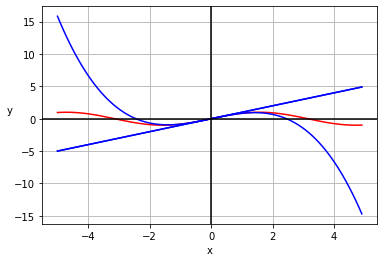

In [202]:
import matplotlib.pyplot as plt
import numpy as np

def f(x):
    return np.sin(x)

x = np.arange(-5, 5, 0.1)
plt.plot(x, f(x), "r")

plt.plot(x, x, "b")
plt.plot(x, x, "")
plt.plot(x, -0.16667 * x ** 3 + x, "b")

# параметры координатной плоскости
plt.xlabel("x")
plt.ylabel("y", rotation=0)
plt.grid()
plt.axhline(y=0, color='k')
plt.axvline(x=0, color='k')

plt.show()

**б) $f(x) = cos(x)$, $x_0=0$, $n_1=1$, $n_2=2$, $n_3=4$;**

In [203]:
import numpy as np
from sympy import *
import math

def f(x):
    return np.cos(x)

def getTaylor(array):
    x0 = array[0]
    n = array[1]
    vec = array[2]
    collectTaylor(x0, n, vec)

def collectTaylor(point, num, values):
    larr = []
    for i in range(num + 1):
        larr.append(round(values[i] / math.factorial(i), i + 2) * (x - point) ** i)
    eq = 0
    for i in range(len(larr)):
        eq += larr[i]
    print(eq)

def getFuncDerValue(func, point, n):
    arr = []
    for i in range(n + 1):
        arr.append(round(func.subs(x, point), 2))
        func = func.diff(x)
    return arr

x = Symbol('x')

function = cos(x)

n = 1
point = 0
getTaylor([point, n, getFuncDerValue(function, point, n)])

n = 2
point = 0
getTaylor([point, n, getFuncDerValue(function, point, n)])

n = 4
point = 0
getTaylor([point, n, getFuncDerValue(function, point, n)])

1
1 - 0.5*x**2
0.041667*x**4 - 0.5*x**2 + 1


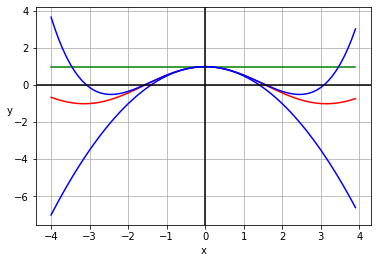

In [11]:
import matplotlib.pyplot as plt
import numpy as np

def f(x):
    return np.cos(x)

x = np.arange(-4, 4, 0.1)
plt.plot(x, f(x), "r")

plt.plot(x, 1+0*x, "g")
plt.plot(x, 1 - 0.5*x**2, "b")
plt.plot(x, 0.041667*x**4 - 0.5*x**2 + 1, "b")

# параметры координатной плоскости
plt.xlabel("x")
plt.ylabel("y", rotation=0)
plt.grid()
plt.axhline(y=0, color='k')
plt.axvline(x=0, color='k')

plt.show()

**в) $f(x) = ln(4+x)$, $x_0=1$, $n_1=1$, $n_2=2$, $n_3=4$.**

In [210]:
import numpy as np
from sympy import *
import math

def f(x):
    return np.log(4+x)

def getTaylor(array):
    x0 = array[0]
    n = array[1]
    vec = array[2]
    collectTaylor(x0, n, vec)

def collectTaylor(point, num, values):
    larr = []
    for i in range(num + 1):
        larr.append(round(values[i] / math.factorial(i), i + 2) * (x - point) ** i)
    eq = 0
    for i in range(len(larr)):
        eq += larr[i]
    print(eq)

def getFuncDerValue(func, point, n):
    arr = []
    for i in range(n + 1):
        arr.append(round(func.subs(x, point), 2))
        func = func.diff(x)
    return arr

x = Symbol('x')

function = log(4+x)

n = 1
point = 1
getTaylor([point, n, getFuncDerValue(function, point, n)])

n = 2
point = 1
getTaylor([point, n, getFuncDerValue(function, point, n)])

n = 4
point = 1
getTaylor([point, n, getFuncDerValue(function, point, n)])

0.2*x + 1.41
0.2*x - 0.02*(x - 1)**2 + 1.41
0.2*x - 0.0004*(x - 1)**4 + 0.003*(x - 1)**3 - 0.02*(x - 1)**2 + 1.41


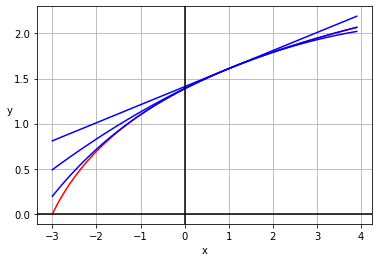

In [214]:
import matplotlib.pyplot as plt
import numpy as np

def f(x):
    return np.log(4+x)

x = np.arange(-3, 4, 0.1)
plt.plot(x, f(x), "r")

plt.plot(x, 0.2*x + 1.41, "b")
plt.plot(x, 0.2*x - 0.02*(x - 1)**2 + 1.41, "b")
plt.plot(x, 0.2*x - 0.0004*(x - 1)**4 + 0.003*(x - 1)**3 - 0.02*(x - 1)**2 + 1.41, "b")

# параметры координатной плоскости
plt.xlabel("x")
plt.ylabel("y", rotation=0)
plt.grid()
plt.axhline(y=0, color='k')
plt.axvline(x=0, color='k')

plt.show()

**Упражнение С1. Для указанной функции в точке $x_0$ построить многочлены Тейлора порядка $n_1$ и $n_2$, в одном графическом окне построить графики функции и многочленов Тейлора: $f(x)=\sqrt{4+x}$, $x_0 = 0$, $n_1=1$, $n_2=2$, $n_3=4$.**

In [14]:
import numpy as np
from sympy import *
import math

def f(x):
    return np.sqrt(4+x)

def getTaylor(array):
    x0 = array[0]
    n = array[1]
    vec = array[2]
    collectTaylor(x0, n, vec)

def collectTaylor(point, num, values):
    larr = []
    for i in range(num + 1):
        larr.append(round(values[i] / math.factorial(i), i + 2) * (x - point) ** i)
    eq = 0
    for i in range(len(larr)):
        eq += larr[i]
    print(eq)

def getFuncDerValue(func, point, n):
    arr = []
    for i in range(n + 1):
        arr.append(round(func.subs(x, point), 2))
        func = func.diff(x)
    return arr

x = Symbol('x')

function = sqrt(4+x)

n = 1
point = 0
getTaylor([point, n, getFuncDerValue(function, point, n)])

n = 2
point = 0
getTaylor([point, n, getFuncDerValue(function, point, n)])

n = 4
point = 0
getTaylor([point, n, getFuncDerValue(function, point, n)])

0.25*x + 2
-0.02*x**2 + 0.25*x + 2
-0.0004*x**4 + 0.002*x**3 - 0.02*x**2 + 0.25*x + 2


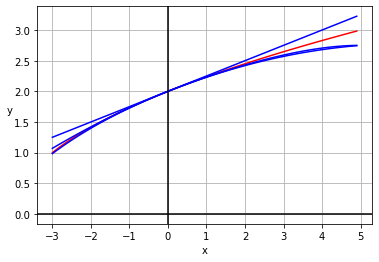

In [221]:
import matplotlib.pyplot as plt
import numpy as np

def f(x):
    return np.sqrt(4+x)

x = np.arange(-3, 5, 0.1)
plt.plot(x, f(x), "r")

plt.plot(x, 0.25*x + 2, "b")
plt.plot(x, -0.02*x**2 + 0.25*x + 2, "b")
plt.plot(x, -0.0004*x**4 + 0.002*x**3 - 0.02*x**2 + 0.25*x + 2, "b")

# параметры координатной плоскости
plt.xlabel("x")
plt.ylabel("y", rotation=0)
plt.grid()
plt.axhline(y=0, color='k')
plt.axvline(x=0, color='k')

plt.show()

**Упражнение С2. Воспользуйтесь $help$, чтобы познакомиться с встроенной функцией approximate_taylor_polynomial. Используя эту функцию, найдите:**

**а) многочлены Тейлора 7-го порядка в точке $x_0=0$ для функций $sin (x)$, $cos (x)$, $e^x$, $ln(1+x)$, $tg (x)$;**

In [10]:
from scipy.interpolate import approximate_taylor_polynomial
import numpy as np

point = 0
n = 7

def f(x):
    return np.sin(x)

print(approximate_taylor_polynomial(f, point, n, 1, order=n+10))

            7             6            5             4          3
-0.0001984 x - 2.294e-13 x + 0.008333 x + 4.621e-14 x - 0.1667 x
              2
 - 2.734e-15 x + 1 x + 2.311e-17


In [289]:
def f(x):
    return np.e**x

print(approximate_taylor_polynomial(f, point, n, 1, order=n+10))

           7            6            5           4          3       2
0.0001984 x + 0.001389 x + 0.008333 x + 0.04167 x + 0.1667 x + 0.5 x + 1 x + 1


In [290]:
def f(x):
    return np.log(1+x)

print(approximate_taylor_polynomial(f, point, n, 1, order=n+10))

       7         6         5          4          3          2
26.57 x + 9.616 x - 4.403 x - 0.9147 x + 0.6622 x - 0.4873 x + 0.9936 x - 1.521e-16


In [291]:
def f(x):
    return np.tan(x)

print(approximate_taylor_polynomial(f, point, n, 1, order=n+10))

         7           6          5             4          3
0.05165 x - 2.4e-11 x + 0.1337 x + 1.688e-12 x + 0.3333 x
              2
 - 8.759e-15 x + 1 x - 1.012e-15


**б) многочлены Тейлора 5-го порядка в точке $x_0=\frac{π}{2}$ для функций $sin (x)$, $cos (x)$.**

In [299]:
from scipy.interpolate import approximate_taylor_polynomial

point = np.pi/2
n = 5

def f(x):
    return np.sin(x)

print(approximate_taylor_polynomial(f, point, n, 1, order=n+10))

            5           4             3       2
-1.733e-13 x + 0.04167 x + 1.947e-14 x - 0.5 x - 4.693e-16 x + 1


In [293]:
def f(x):
    return np.cos(x)

print(approximate_taylor_polynomial(f, point, n, 1, order=n+10))

           5             4          3             2
-0.008333 x + 8.931e-15 x + 0.1667 x - 8.973e-16 x - 1 x + 1.066e-16


**Ответить на контрольные вопросы:**

**1. Как можно использовать многочлены Тейлора для приближенных оценок значений функции?**

*С помощью разложения функции по формуле Тейлора можно получить достаточно точное значение функции в точке, причём точность зависит от величины степени разложения.*

**2. Как изменяется ошибка в оценках значений функции с помощью формулы Тейлора при увеличении порядка многочлена?**

*При увеличении порядка многочлена уменьшается oшибка в оценках значений функции.*

**3. Как изменяется ошибка в оценках значений функции с помощью формулы Тейлора при удалении значений аргумента от точки разложения $x_0$?**

*Ошибка в оценках значений функции с помощью формулы Тейлора при удалении значений аргумента от точки разложения $x0$ увеличивается (видно из графиков).*

**Дополнительное задание на защите: функция, получает функцию, порядок, точку, строит на одном график функции производных до порядка.**

1
1.0*x + 1
0.5*x**2 + 1.0*x + 1
0.16667*x**3 + 0.5*x**2 + 1.0*x + 1
0.041667*x**4 + 0.16667*x**3 + 0.5*x**2 + 1.0*x + 1
0.0083333*x**5 + 0.041667*x**4 + 0.16667*x**3 + 0.5*x**2 + 1.0*x + 1


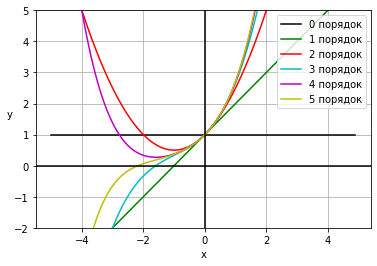

In [85]:
import numpy as np
from sympy import *
import math
import matplotlib.pyplot as plt


def getTaylor(array):
    x0 = array[0]
    n = array[1]
    vec = array[2]
    return collectTaylor(x0, n, vec)


def collectTaylor(point, num, values):
    larr = []
    for i in range(num + 1):
        larr.append(round(values[i] / math.factorial(i), i + 2) * (x - point) ** i)
    eq = 0
    for i in range(len(larr)):
        eq += larr[i]
    return eq


def getFuncDerValue(func, point, n):
    arr = []
    for i in range(n + 1):
        arr.append(round(func.subs(x, point), 2))
        func = func.diff(x)
    return arr


def getTaylorValue(f, n, point):
    for i in range(n + 1):
        eee = getTaylor([point, i, getFuncDerValue(function, point, i)])
        drawTaylor(eee, i)


def drawTaylor(f, num):
    print(f)
    arr_colors = ["k", "g", "r", "c", "m", "y", "b"]
    x_graph = np.arange(-5, 5, 0.1)
    y_graph = []
    for i in range(len(x_graph)):
        y_graph.append(f.evalf(subs={x: x_graph[i]}))
    plt.plot(
        x_graph, y_graph, arr_colors[num % len(arr_colors)], label=str(num) + " порядок"
    )


###############################################
x = Symbol("x")
function = np.e**x
n = 5
point = 0
getTaylorValue(function, n, point)
######################################################

# параметры координатной плоскости
plt.xlabel("x")
plt.ylabel("y", rotation=0)
plt.ylim(-2, 5)
plt.grid()
plt.axhline(y=0, color="k")
plt.axvline(x=0, color="k")
# вывести легенду графиков
plt.legend()
plt.show()